In [1]:
import sys,array
from ROOT import TFile, TCanvas
import root_numpy as rn
import numpy as np
import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.weight'] = 'bold'
#matplotlib.rc('text', usetex=True)
#matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

/Library/Python/2.7/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.12.1 is currently installed but you installed root_numpy against numpy 1.8.0rc1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [2]:
# Two shower contains the additional cuts from joseph

name = 'singleshower'
#name = 'pi0'
#name = 'sel2'
stage=name

f = '/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/MCBNBCos/BT_backgrounds_%s.root'%stage
on ='/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/OnBeam/BT_backgrounds_%s.root'%stage
off='/Volumes/UBooNEDataMCC8/MCC8_3/AnaFiles/OffBeam/BT_backgrounds_%s.root'%stage

#name = 'twoshower'

t = rn.root2array(f,treename='tree')
df = pd.DataFrame(t)

a = rn.root2array(on,treename='tree')
df0 = pd.DataFrame(a)

b = rn.root2array(off,treename='tree')
df1 = pd.DataFrame(b)

if name == 'twoshower':
    df=df.query('(pi0_low_shrE > 40 | pi0_high_shrE > 40) & (pi0_low_radL < 100 & pi0_high_radL < 80)')
    df0=df0.query('(pi0_low_shrE > 40 | pi0_high_shrE > 40) & (pi0_low_radL < 100 & pi0_high_radL < 80)')
    df1=df1.query('(pi0_low_shrE > 40 | pi0_high_shrE > 40) & (pi0_low_radL < 100 & pi0_high_radL < 80)')
    

df['pi0_totalE'] = df['pi0_low_shrE'] + df['pi0_high_shrE']
df0['pi0_totalE'] = df0['pi0_low_shrE'] + df0['pi0_high_shrE']
df1['pi0_totalE'] = df1['pi0_low_shrE'] + df1['pi0_high_shrE']

df['pi0_Easym'] =  (df['pi0_high_shrE'] -  df['pi0_low_shrE']  ) / (df['pi0_high_shrE']  + df['pi0_low_shrE'] )
df0['pi0_Easym'] = (df0['pi0_high_shrE'] - df0['pi0_low_shrE'] ) / (df0['pi0_high_shrE'] + df0['pi0_low_shrE'] )
df1['pi0_Easym'] = (df1['pi0_high_shrE'] - df1['pi0_low_shrE'] ) / (df1['pi0_high_shrE'] + df1['pi0_low_shrE'] )

df['mu_endx'] = np.where(df.mu_startx-df.vtx_x == 0, df.mu_endx, df.mu_startx)
df['mu_endy'] = np.where(df.mu_starty - df.vtx_y == 0, df.mu_endy, df.mu_starty)
df['mu_endz'] = np.where(df.mu_startz - df.vtx_z == 0, df.mu_endz, df.mu_startz)

df0['mu_endx'] = np.where(df0.mu_startx - df0.vtx_x == 0, df0.mu_endx, df0.mu_startx)
df0['mu_endy'] = np.where(df0.mu_starty - df0.vtx_y == 0, df0.mu_endy, df0.mu_starty)
df0['mu_endz'] = np.where(df0.mu_startz - df0.vtx_z == 0, df0.mu_endz, df0.mu_startz)

df1['mu_endx'] = np.where(df1.mu_startx - df1.vtx_x == 0, df1.mu_endx, df1.mu_startx)
df1['mu_endy'] = np.where(df1.mu_starty - df1.vtx_y == 0, df1.mu_endy, df1.mu_starty)
df1['mu_endz'] = np.where(df1.mu_startz - df1.vtx_z == 0, df1.mu_endz, df1.mu_startz)

df['mu_startx'] = df['vtx_x']
df['mu_starty'] = df['vtx_y']
df['mu_startz'] = df['vtx_z']

df0['mu_startx'] = df0['vtx_x']
df0['mu_starty'] = df0['vtx_y']
df0['mu_startz'] = df0['vtx_z']

df['tot_hits_0'] = df['n_track_hits_0'] + df['n_shower_hits_0']
df['tot_hits_1'] = df['n_track_hits_1'] + df['n_shower_hits_1']
df['tot_hits_2'] = df['n_track_hits_2'] + df['n_shower_hits_2']
df0['tot_hits_0'] = df0['n_track_hits_0'] + df0['n_shower_hits_0']
df0['tot_hits_1'] = df0['n_track_hits_1'] + df0['n_shower_hits_1']
df0['tot_hits_2'] = df0['n_track_hits_2'] + df0['n_shower_hits_2']
df1['tot_hits_0'] = df1['n_track_hits_0'] + df1['n_shower_hits_0']
df1['tot_hits_1'] = df1['n_track_hits_1'] + df1['n_shower_hits_1']
df1['tot_hits_2'] = df1['n_track_hits_2'] + df1['n_shower_hits_2']


In [3]:
print df0.shape, df1.shape, df.shape



(257, 96) (7, 96) (2167, 96)


In [4]:
all_but_sig_v = df.query('bkgd_id != 2')

dfa = df.query('pi0_low_origin != 2 and pi0_high_origin != 2')

cos_v = df.query('bkgd_id == 1 or pi0_low_origin == 2 or pi0_high_origin == 2')
cc1pi0_v = dfa.query('bkgd_id == 2')
nc1pi0_v = dfa.query('bkgd_id == 3')
multpi0_v = dfa.query('bkgd_id == 5')
cccex_v = dfa.query('bkgd_id == 8 ')
nu_EM_v = dfa.query('bkgd_id == 10 or ((bkgd_id ==12 or bkgd_id ==11) &\
                   (pi0_low_type == 1 or pi0_high_type == 1) )')

oth_v = dfa.query('bkgd_id == 0 or bkgd_id == 4 or\
                  bkgd_id == 6 or bkgd_id == 7 or bkgd_id == 9 or bkgd_id == 13 or \
                  ((bkgd_id ==12 or bkgd_id ==11) & pi0_low_type != 1 & pi0_high_type != 1)')

In [5]:
print cccex_v.shape[0], cc1pi0_v.shape[0]


85 1295


In [90]:
# This one is for pi0 shower
# break ccoth into :
# CCoth -> shower is a reco'd track (cosmic or neutrino)
#       -> shower is reco'd noise
#       -> shower is a reco'd cosmic shower
#       -> shower is a reco'd neutrino shower (non-pi0)

# from pi0 : (1)
# origin: cosmic (2), neutrino (1)
# type: track (0), shower (1), noise (-1)

cc1pi0_both_nupi0_v = cc1pi0_v.query('pi0_low_from_pi0 == 1 & pi0_high_from_pi0 == 1')
cc1pi0_one_nupi0_v = cc1pi0_v.query('(pi0_low_from_pi0 == 1 & pi0_high_from_pi0 == 0) | (pi0_low_from_pi0 == 0 & pi0_high_from_pi0 == 1)')
cc1pi0_neither_nupi0_v = cc1pi0_v.query('pi0_low_from_pi0 != 1 & pi0_high_from_pi0 != 1')

print 'All: ',cc1pi0_v.shape[0]
print 'Both, one, neither pi0: ', cc1pi0_both_nupi0_v.shape[0], cc1pi0_one_nupi0_v.shape[0], cc1pi0_neither_nupi0_v.shape[0]


cc1pi0_one_nupi0_both_nu_v = cc1pi0_one_nupi0_v.query('pi0_low_origin == 1 & pi0_high_origin == 1')
cc1pi0_one_nupi0_one_nushr_v = cc1pi0_one_nupi0_both_nu_v.query('pi0_low_type == 1 & pi0_high_type == 1')
cc1pi0_one_nupi0_one_nutrk_v = cc1pi0_one_nupi0_both_nu_v.query('(pi0_low_type == 1 & pi0_high_type==0) | (pi0_low_type == 0 & pi0_high_type == 1) ')

cc1pi0_one_nupi0_one_cosmic_v = cc1pi0_one_nupi0_v.query('(pi0_low_origin == 1 & pi0_high_origin == 2) | (pi0_low_origin == 2 & pi0_high_origin == 1) ')

print '  One - both nu : ', cc1pi0_one_nupi0_both_nu_v.shape[0]
print '  One - one nu shr: ', cc1pi0_one_nupi0_one_nushr_v.shape[0]
print '  One - one nu trk: ', cc1pi0_one_nupi0_one_nutrk_v.shape[0]
print '  One - one cosmic: ', cc1pi0_one_nupi0_one_cosmic_v.shape[0]

cc1pi0_neither_nupi0_both_nu_v = cc1pi0_neither_nupi0_v.query('pi0_low_origin == 1 & pi0_high_origin == 1')
cc1pi0_neither_nupi0_both_nushr_v = cc1pi0_neither_nupi0_both_nu_v.query('pi0_low_type == 1 & pi0_high_type == 1')
cc1pi0_neither_nupi0_oneshr_onetrk_v = cc1pi0_neither_nupi0_both_nu_v.query('(pi0_low_type == 1 & pi0_high_type == 0) | (pi0_low_type == 0 & pi0_high_type == 1)')
cc1pi0_neither_nupi0_both_nutrk_v = cc1pi0_neither_nupi0_both_nu_v.query('pi0_low_type == 0 & pi0_high_type == 0')

cc1pi0_neither_nupi0_onenu_onecos_v = cc1pi0_neither_nupi0_v.query('(pi0_low_origin == 1 & pi0_high_origin == 2) | (pi0_low_origin == 2 & pi0_high_origin == 1)')
cc1pi0_neither_nupi0_bothcos_v = cc1pi0_neither_nupi0_v.query('(pi0_low_origin == 2 & pi0_high_origin == 2)')

print 'Both from pi0 shower: ', cc1pi0_both_nupi0_v.shape[0]
print ' 1pi0,1nushr; 1pi0,1nutrk; 1pi0,1cosmic: ', cc1pi0_one_nupi0_one_nushr_v.shape[0],cc1pi0_one_nupi0_one_nutrk_v.shape[0],cc1pi0_one_nupi0_one_cosmic_v.shape[0]
print ' 2nushr; 1nushr,1nutrk; 2nutrk; 1nu,1cos; 2cos: ', cc1pi0_neither_nupi0_both_nushr_v.shape[0], cc1pi0_neither_nupi0_oneshr_onetrk_v.shape[0],\
cc1pi0_neither_nupi0_both_nutrk_v.shape[0], cc1pi0_neither_nupi0_onenu_onecos_v.shape[0], cc1pi0_neither_nupi0_bothcos_v.shape[0]


#print cc1pi0_shr_nopi0_nu_v.event.values
#print cc1pi0_shr_nopi0_nu_v.mu_origin

All:  1295
Both, one, neither pi0:  0 0 1295
  One - both nu :  0
  One - one nu shr:  0
  One - one nu trk:  0
  One - one cosmic:  0
Both from pi0 shower:  0
 1pi0,1nushr; 1pi0,1nutrk; 1pi0,1cosmic:  0 0 0
 2nushr; 1nushr,1nutrk; 2nutrk; 1nu,1cos; 2cos:  0 0 0 0 0


In [91]:
# This one is for pi0 shower
# break ccoth into :
# CCoth -> shower is a reco'd track (cosmic or neutrino)
#       -> shower is reco'd noise
#       -> shower is a reco'd cosmic shower
#       -> shower is a reco'd neutrino shower (non-pi0)

# from pi0 : (1)
# origin: cosmic (2), neutrino (1)
# type: track (0), shower (1), noise (-1)

print oth_v.shape[0]
ccoth_both_nupi0_v = oth_v.query('pi0_low_from_pi0 == 1 & pi0_high_from_pi0 == 1')
ccoth_one_nupi0_v = oth_v.query('(pi0_low_from_pi0 == 1 & pi0_high_from_pi0 == 0) | (pi0_low_from_pi0 == 0 & pi0_high_from_pi0 == 1)')
ccoth_neither_nupi0_v = oth_v.query('pi0_low_from_pi0 != 1 & pi0_high_from_pi0 != 1')

print 'All: ', oth_v.shape[0]
print 'Both, one, neither pi0: ', ccoth_both_nupi0_v.shape[0], ccoth_one_nupi0_v.shape[0], ccoth_neither_nupi0_v.shape[0]

ccoth_one_nupi0_both_nu_v = ccoth_one_nupi0_v.query('pi0_low_origin == 1 & pi0_high_origin == 1')
ccoth_one_nupi0_one_nushr_v = ccoth_one_nupi0_both_nu_v.query('pi0_low_type == 1 & pi0_high_type == 1')
ccoth_one_nupi0_one_nutrk_v = ccoth_one_nupi0_both_nu_v.query('(pi0_low_type == 1 & pi0_high_type==0) | (pi0_low_type == 0 & pi0_high_type == 1) ')

ccoth_one_nupi0_one_cosmic_v = ccoth_one_nupi0_v.query('(pi0_low_origin == 1 & pi0_high_origin == 2) | (pi0_low_origin == 2 & pi0_high_origin == 1) ')

#print '  One - both nu : ', ccoth_one_nupi0_both_nu_v.shape[0]
#print '  One - one nu shr: ', ccoth_one_nupi0_one_nushr_v.shape[0]
#print '  One - one nu trk: ', ccoth_one_nupi0_one_nutrk_v.shape[0]
#print '  One - one cosmic: ', ccoth_one_nupi0_one_cosmic_v.shape[0]

ccoth_neither_nupi0_both_nu_v = ccoth_neither_nupi0_v.query('pi0_low_origin == 1 & pi0_high_origin == 1')
ccoth_neither_nupi0_both_nushr_v = ccoth_neither_nupi0_both_nu_v.query('pi0_low_type == 1 & pi0_high_type == 1')
ccoth_neither_nupi0_oneshr_onetrk_v = ccoth_neither_nupi0_both_nu_v.query('(pi0_low_type == 1 & pi0_high_type == 0) | (pi0_low_type == 0 & pi0_high_type == 1)')
ccoth_neither_nupi0_both_nutrk_v = ccoth_neither_nupi0_both_nu_v.query('pi0_low_type == 0 & pi0_high_type == 0')

ccoth_neither_nupi0_onenu_onecos_v = ccoth_neither_nupi0_v.query('(pi0_low_origin == 1 & pi0_high_origin == 2) | (pi0_low_origin == 2 & pi0_high_origin == 1)')
ccoth_neither_nupi0_onenushr_onecos_v = ccoth_neither_nupi0_onenu_onecos_v.query('(pi0_low_origin == 1 & pi0_low_type == 1) | (pi0_high_origin == 1 & pi0_high_type == 1 )')
ccoth_neither_nupi0_onenutrk_onecos_v = ccoth_neither_nupi0_onenu_onecos_v.query('(pi0_low_origin == 1 & pi0_low_type == 0) | (pi0_high_origin == 1 & pi0_high_type == 0 )')

print ccoth_neither_nupi0_v.shape
print ccoth_neither_nupi0_onenu_onecos_v.shape
print ccoth_neither_nupi0_onenushr_onecos_v.shape

ccoth_neither_nupi0_bothcos_v = ccoth_neither_nupi0_v.query('(pi0_low_origin == 2 & pi0_high_origin == 2)')
#print ccoth_neither_nupi0_bothcos_v.shape

print 'Both from pi0 shower: ', ccoth_both_nupi0_v.shape[0]
print ' 1pi0,1nushr; 1pi0,1nutrk; 1pi0,1cosmic: ', ccoth_one_nupi0_one_nushr_v.shape[0],ccoth_one_nupi0_one_nutrk_v.shape[0],ccoth_one_nupi0_one_cosmic_v.shape[0]
print ' 2nushr; 1nushr,1nutrk; 2nutrk; 1nu,1cos; 2cos: ', ccoth_neither_nupi0_both_nushr_v.shape[0], ccoth_neither_nupi0_oneshr_onetrk_v.shape[0],\
ccoth_neither_nupi0_both_nutrk_v.shape[0], ccoth_neither_nupi0_onenu_onecos_v.shape[0], ccoth_neither_nupi0_bothcos_v.shape[0]


print ' 1 nu shr, 1 cos: ', ccoth_neither_nupi0_onenushr_onecos_v.shape[0]
print ' 1 nu trk, 1 cos: ', ccoth_neither_nupi0_onenutrk_onecos_v.shape[0]

#print cc1pi0_shr_nopi0_nu_v.event.values
#print cc1pi0_shr_nopi0_nu_v.mu_origin

510
All:  510
Both, one, neither pi0:  0 0 510
(510, 96)
(0, 96)
(0, 96)
Both from pi0 shower:  0
 1pi0,1nushr; 1pi0,1nutrk; 1pi0,1cosmic:  0 0 0
 2nushr; 1nushr,1nutrk; 2nutrk; 1nu,1cos; 2cos:  0 0 0 0 0
 1 nu shr, 1 cos:  0
 1 nu trk, 1 cos:  0


In [95]:
# This one is for single shower
# break ccoth into :
# CCoth -> shower is a reco'd track (cosmic or neutrino)
#       -> shower is reco'd noise
#       -> shower is a reco'd cosmic shower
#       -> shower is a reco'd neutrino shower (non-pi0)

# from pi0 : (1)
# origin: cosmic (2), neutrino (1)
# type: track (0), shower (1), noise (-1)
ccoth_trk_nu_v = oth_v.query('gamma_type == 0 & gamma_origin == 1')
ccoth_trk_cos_v = oth_v.query('gamma_type == 0 & gamma_origin == 2')

ccoth_shr_pi0_nu_v = oth_v.query('gamma_type == 1 & gamma_origin == 1 & gamma_from_pi0 == 1')
ccoth_shr_nopi0_nu_v = oth_v.query('gamma_type == 1 & gamma_origin == 1 & gamma_from_pi0 ==0')

ccoth_shr_cos_v = oth_v.query('gamma_type == 1 & gamma_origin == 2')
ccoth_noise_v = oth_v.query('gamma_type == -1')

cc1pi0_trk_nu_v = cc1pi0_v.query('gamma_type == 0 & gamma_origin == 1')
cc1pi0_trk_cos_v = cc1pi0_v.query('gamma_type == 0 & gamma_origin == 2')
cc1pi0_shr_pi0_nu_v = cc1pi0_v.query('gamma_type == 1 & gamma_origin == 1 & gamma_from_pi0 == 1')
cc1pi0_shr_nopi0_nu_v = cc1pi0_v.query('gamma_type == 1 & gamma_origin == 1 & gamma_from_pi0 == 0')

cc1pi0_shr_cos_v = cc1pi0_v.query('gamma_type == 1 & gamma_origin == 2')
cc1pi0_noise_v = cc1pi0_v.query('gamma_type == -1')

print ccoth_trk_nu_v.shape[0] ,ccoth_trk_cos_v.shape[0] , ccoth_shr_nopi0_nu_v.shape[0], ccoth_shr_pi0_nu_v.shape[0], ccoth_shr_cos_v.shape[0], ccoth_noise_v.shape[0] ,oth_v.shape[0]
#print cc1pi0_trk_nu_v.shape[0] , cc1pi0_trk_cos_v.shape[0] ,cc1pi0_shr_nopi0_nu_v.shape[0],cc1pi0_shr_pi0_nu_v.shape[0], cc1pi0_shr_cos_v.shape[0], cc1pi0_noise_v.shape[0] ,cc1pi0_v.shape[0]
#print ccoth_shr_nopi0_nu_v.event.values #, ccoth_shr_nopi0_nu_v.shape[0]

170 3 141 123 67 6 510


In [96]:
print 'CC1pi0: ', cc1pi0_v.shape[0]
print 'FSEM  : ', nu_EM_v.shape[0]
print 'CCCex : ', cccex_v.shape[0]
print 'CCCex : ', multpi0_v.shape[0]
print 'NCpi0: ', nc1pi0_v.shape[0] 
print 'Other : ', oth_v.shape[0]
print 'Cosmic MC : ', cos_v.shape[0]

tot = cc1pi0_v.shape[0] + nu_EM_v.shape[0] + cccex_v.shape[0] + multpi0_v.shape[0] + nc1pi0_v.shape[0] + oth_v.shape[0] + cos_v.shape[0]
print tot

CC1pi0:  1295
FSEM  :  51
CCCex :  85
CCCex :  109
NCpi0:  57
Other :  510
Cosmic MC :  60
2167


In [97]:
#tot_on = 544751
#tot_off = 213095 #218466 #379202
#tot_bnbcos = 420400 #206500 #384200 #101600
#int_per_1e20POT = 99035.2 
#dataPOT = 0.495 * (tot_on) / 567157 #547616  
#mcbnbcos_POT = float(tot_bnbcos)/int_per_1e20POT 
#off_to_on = 1.23 * (400675./tot_off) * (tot_on/567157.)
#mc_to_onbeam = dataPOT/mcbnbcos_POT

dataPOT = 0.492
mcbnbcos_POT = 4.23214
off_to_on = 2.168404449
mc_to_onbeam = dataPOT/mcbnbcos_POT
print "POTS : ", dataPOT, mcbnbcos_POT 
print "MC to OnBeam : ", mc_to_onbeam
print "Off to OnBeam: ",off_to_on

var = 'mu_startx'

oth_w = [ mc_to_onbeam for i in xrange(len(oth_v[var].values)) ] 
cos_w = [ mc_to_onbeam for i in xrange(len(cos_v[var].values)) ] 
nc1pi0_w = [ mc_to_onbeam for i in xrange(len(nc1pi0_v[var].values)) ] 
multpi0_w = [ mc_to_onbeam for i in xrange(len(multpi0_v[var].values)) ] 
cccex_w = [ mc_to_onbeam for i in xrange(len(cccex_v[var].values)) ] 
nu_EM_w = [ mc_to_onbeam for i in xrange(len(nu_EM_v[var].values)) ] 
oth_w = [ mc_to_onbeam for i in xrange(len(oth_v[var].values)) ] 
sig_w = [ mc_to_onbeam for i in xrange(len(cc1pi0_v[var].values)) ] 

cos_ext_w = [ off_to_on for i in xrange(df1.shape[0]) ] 
all_w = [ mc_to_onbeam for i in xrange(len(df[var].values)) ] 

tot = len(all_w) * mc_to_onbeam + len(cos_ext_w) * off_to_on
print tot

POTS :  0.492 4.23214
MC to OnBeam :  0.11625324304
Off to OnBeam:  2.168404449
267.099608811


In [98]:
# print '\nSignal : ', len(sig_v) * mc_to_onbeam /tot

# print '\nBackgorunds (CC 0 pi0): '
# print ' CC Cex : ', len(cccex_v)*mc_to_onbeam / tot
# print ' CC gamma : ', len(ccgamma_v)*mc_to_onbeam  / tot
# print ' Kaon : ', len(kaon_v)*mc_to_onbeam / tot
# print ' CCOther : ', (len(ccoth_v) * mc_to_onbeam - len(kaon_w)*mc_to_onbeam)/ tot

# print '\nBackgorunds (NC >=1 pi0): '
# print ' NC 1pi0 : ', len(nc1pi0_w)*mc_to_onbeam / tot

# print '\nBackgorunds (NC 0 pi0): '
# print ' NC Cex : ', len(nccex_w)*mc_to_onbeam / tot
# print ' NCOther : ', (len(ncoth_w)*mc_to_onbeam - len(nccex_w)*mc_to_onbeam)/ tot

# print '\nBackgorunds (Other): '
# print ' CC 1pi0 out FV : ', len(cc1pi0_outFV_w)*mc_to_onbeam / tot
# print ' Multiple pi0 : ', len(multpi0_w)*mc_to_onbeam / tot
# print ' Nue : ', len(nue_w)*mc_to_onbeam / tot
# print ' Antinumu : ', len(antinumu_w)*mc_to_onbeam / tot

# print '\nBackgorunds (Cosmics): '
# print ' No MCT Match : ', len(cos_w) *mc_to_onbeam  / tot
# print ' Cosmic (Data) : ', len(cos_ext_w) * off_to_on / tot
# print ' Noise         : ', len(oth_w) * off_to_on / tot


In [99]:
exclude_var_v =[ 'mu_startx','mu_starty','mu_startz','mu_endx','mu_endy','mu_endz','vtx_x',\
                'vtx_y','vtx_z','pi0_oangle','pi0_totalE','mu_phi','pi0_Easym','pi0_low_radL',\
                'pi0_high_radL','pi0_high_shrE','pi0_mass_corr','pi0_low_shrE_corr','pi0_high_shrE_corr',\
                'gamma_E','gamma_RL', 'gamma_E_corr','pi0_low_IP_w_vtx','pi0_high_IP_w_vtx',\
                'pi0_IP','pi0_high_IP_w_vtx','tot_hits_0','tot_hits_1','tot_hits_2','n_track_hits_0',\
                'n_track_hits_1', 'n_track_hits_2','n_shower_hits_0','n_shower_hits_1','n_shower_hits_2']  

In [100]:
def makeOnOffPlots(var,xmin,xmax,nbins=20,xlabel='',pottitle=''):

    x_on, y_on = np.histogram(df0[var].values,bins=nbins,range=(xmin,xmax))
    x_off, y_off = np.histogram(df1[var].values,bins=nbins,range=(xmin,xmax))
    x_bnb, y_bnb = np.histogram(df[var].values,bins=nbins,range=(xmin,xmax))
    
    bins = (y_off[:-1] + y_off[1:])/2
    bin_width = bins[1]-bins[0]

    bnbcos_m = x_bnb * mc_to_onbeam 
    off_m = x_off*off_to_on
     
    err_on = np.sqrt(x_on)
    err_off = np.sqrt(x_off) *off_to_on
    err_mc = np.sqrt(x_bnb) * mc_to_onbeam
    err_mc_off = np.sqrt(err_mc * err_mc + err_off * err_off)
    err_on_off = np.sqrt(err_on * err_on + err_off * err_off)

    weights = [cos_ext_w,cos_w,oth_w,nc1pi0_w,multpi0_w,cccex_w,nu_EM_w,sig_w]

    lgd = 0
    
    labels_tst = ['Cosmics','Cosmic+Neutrino','Other','$\\nu_{\mu}$ NC $\pi^0$',\
              '$\\nu_{\mu}$ CC Mult $\pi^0$','$\\nu_{\mu}$ CC CEx','Final State EM',\
              '$\\nu_{\mu}$ CC 1 $\pi^0$']
    
    colors_tst = ['lightgrey','dimgrey','darkgoldenrod','lemonchiffon','turquoise','darkcyan','darkblue','salmon'] 

    fig,ax = plt.subplots(figsize=(8,6))
    
    counts, edges,_ = ax.hist([df1[var].values,cos_v[var].values,oth_v[var].values,nc1pi0_v[var].values,multpi0_v[var].values,\
        cccex_v[var].values,nu_EM_v[var].values,cc1pi0_v[var].values],bins=nbins,label=labels_tst,color=colors_tst,\
        ec='None',stacked=True,\
        range=(xmin,xmax),weights=weights,rwidth=bin_width,histtype='stepfilled')
    plt.bar(bins - bin_width/2,err_mc_off*2,width=bin_width,bottom = bnbcos_m + off_m - err_mc_off,\
        alpha=.5,  fill=False, linewidth=0,hatch='\\\\\\\\')
    plt.errorbar(bins,x_on,xerr=bin_width/2,yerr=err_on,fmt='ko',label='OnBeam',markersize=6,lw=1.5)
    handles,labels = ax.get_legend_handles_labels()
    if var in exclude_var_v:
        lgd = plt.legend(handles=handles,fontsize=12,loc='upper left',bbox_to_anchor=(1,1),title=pottitle)
    else:
        lgd = plt.legend(handles=handles,fontsize=12,loc=0,title=pottitle) #,loc='upper left',bbox_to_anchor=(1,0.9))
   
    plt.grid(True)
    plt.xlabel(xlabel,fontsize=18,weight='bold')
    plt.ylabel('Events',fontsize=18,weight='bold')
    plt.xlim(xmin,xmax)
    
    if name == 'twoshower' and var =='nshrs':
        plt.yscale('log')
        plt.savefig('Plots/Physics_%s_onoffseparate_%s_log.png'%(stage,var),bbox_extra_artists=(lgd,), bbox_inches='tight')      
    
    plt.yscale('linear')
    plt.ylim(0)    
    plt.savefig('Plots/Physics_%s_onoffseparate_%s.png'%(stage,var),bbox_extra_artists=(lgd,), bbox_inches='tight')

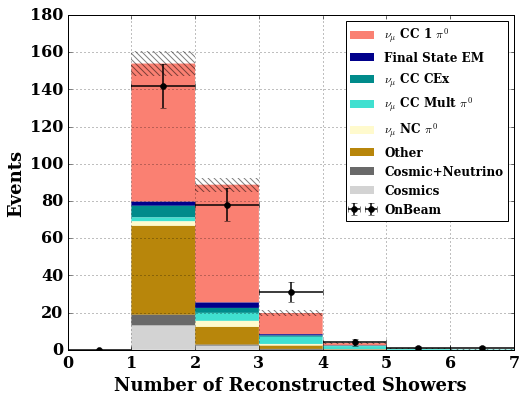

In [101]:
makeOnOffPlots('nshrs',0,7,nbins=7,xlabel='Number of Reconstructed Showers')

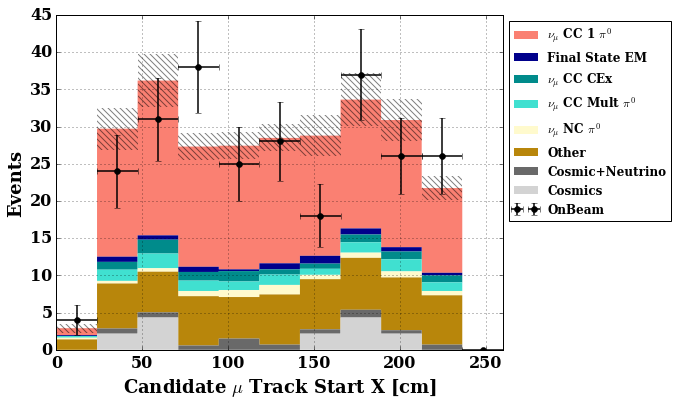

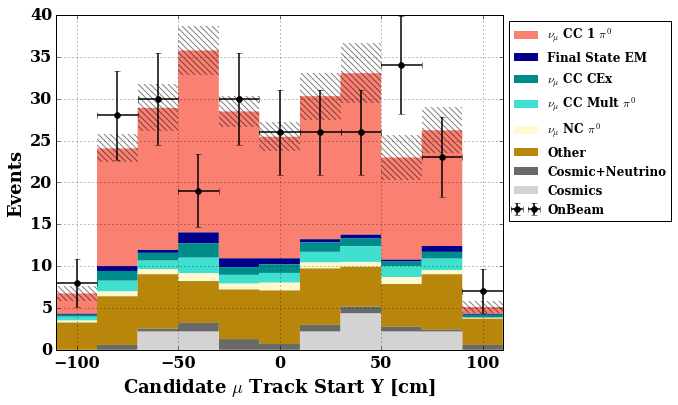

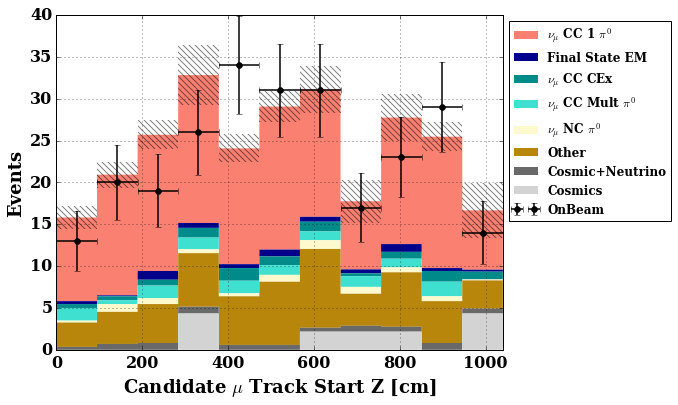

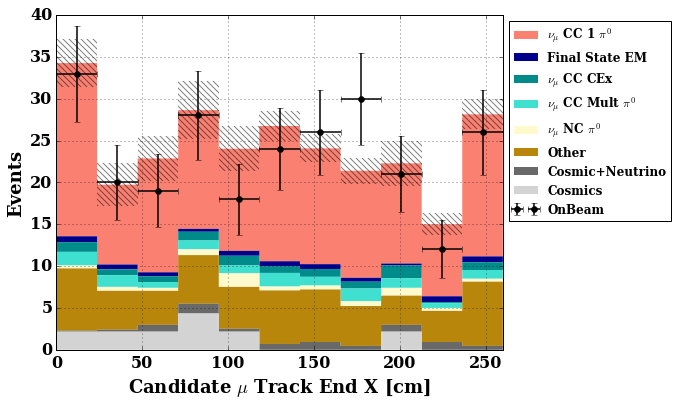

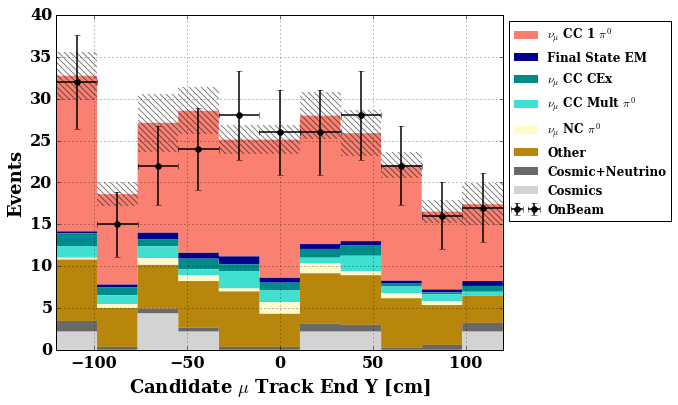

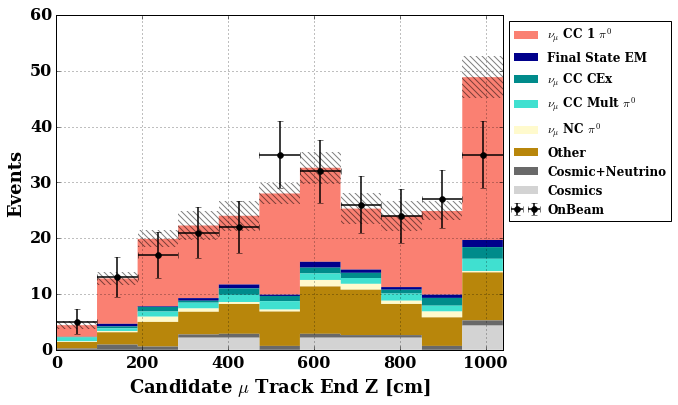

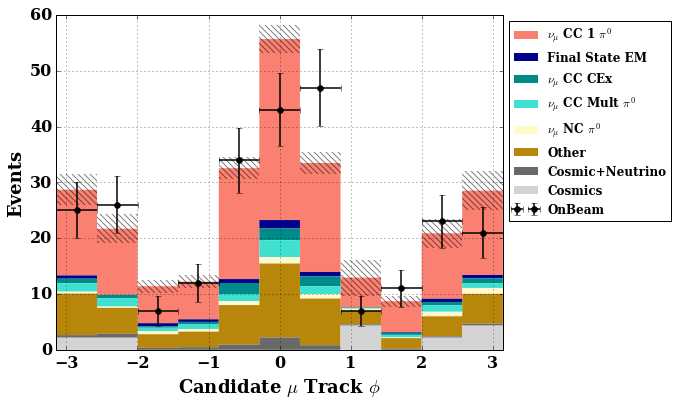

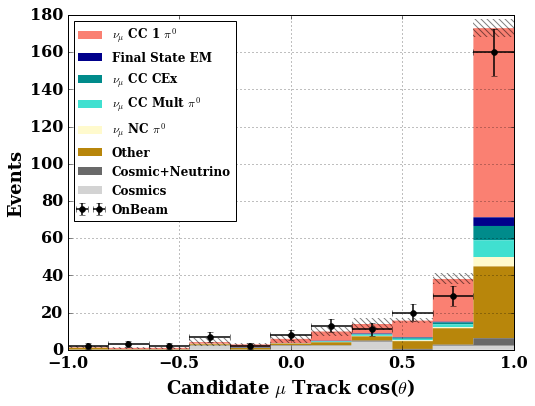

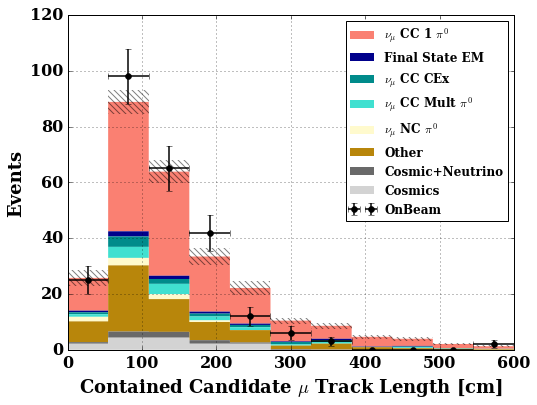

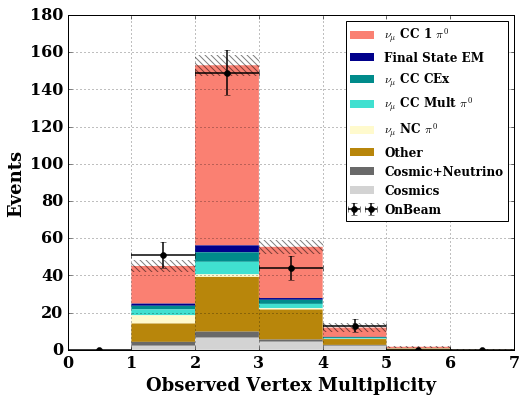

In [102]:
makeOnOffPlots('mu_startx',0,260,nbins=11,xlabel='Candidate $\mu$ Track Start X [cm]')
makeOnOffPlots('mu_starty',-110,110,nbins=11,xlabel='Candidate $\mu$ Track Start Y [cm]')
makeOnOffPlots('mu_startz',0,1040,nbins=11,xlabel='Candidate $\mu$ Track Start Z [cm]')
makeOnOffPlots('mu_endx',0,260,nbins=11,xlabel='Candidate $\mu$ Track End X [cm]')
makeOnOffPlots('mu_endy',-120,120,nbins=11,xlabel='Candidate $\mu$ Track End Y [cm]')
makeOnOffPlots('mu_endz',0,1040,nbins=11,xlabel='Candidate $\mu$ Track End Z [cm]')

makeOnOffPlots('mu_phi',-3.14,3.14,nbins=11,xlabel='Candidate $\mu$ Track $\\phi$')
makeOnOffPlots('mu_angle',-1,1,nbins=11,xlabel='Candidate $\mu$ Track cos($\\theta$)')
makeOnOffPlots('mu_len',0,600,nbins=11,xlabel='Contained Candidate $\mu$ Track Length [cm]')
makeOnOffPlots('mult',0,7,nbins=7,xlabel='Observed Vertex Multiplicity')

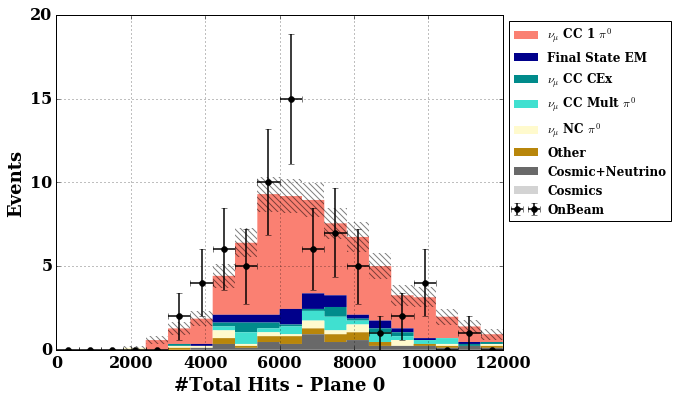

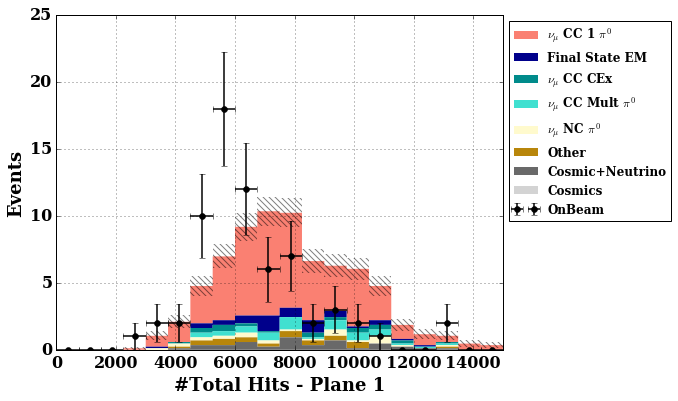

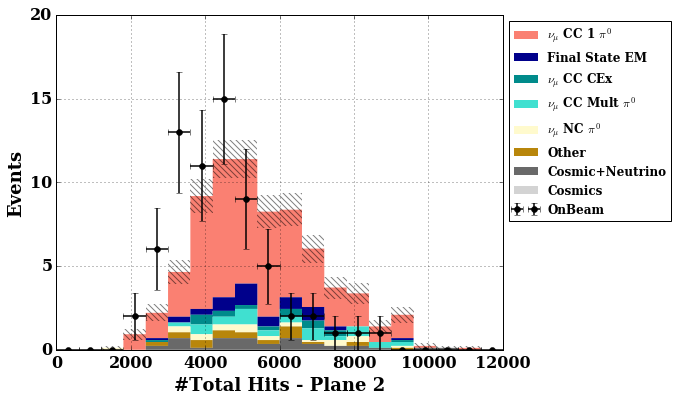

In [75]:
makeOnOffPlots('tot_hits_0',0,12000,xlabel='#Total Hits - Plane 0')
makeOnOffPlots('tot_hits_1',0,15000,xlabel='#Total Hits - Plane 1')
makeOnOffPlots('tot_hits_2',0,12000,xlabel='#Total Hits - Plane 2')

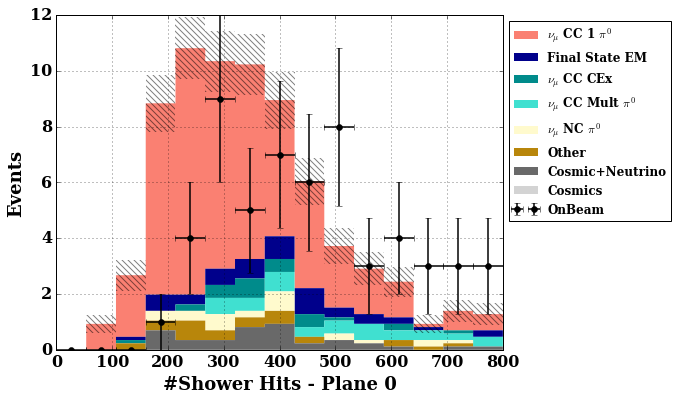

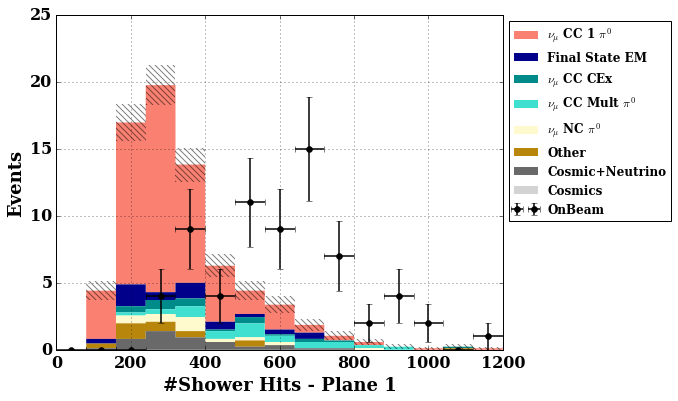

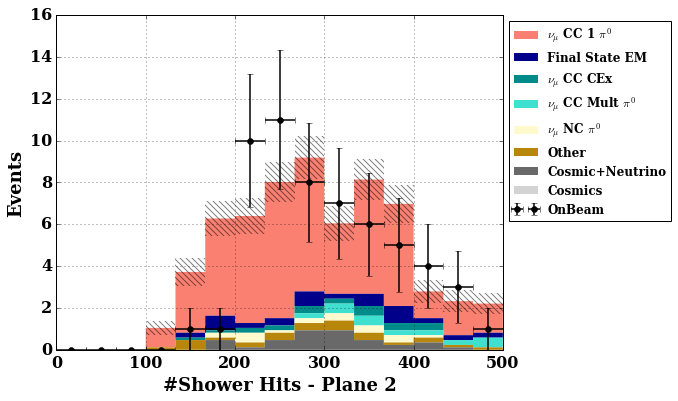

In [76]:
makeOnOffPlots('n_shower_hits_0',0,800,nbins=15,xlabel='#Shower Hits - Plane 0')
makeOnOffPlots('n_shower_hits_1',0,1200,nbins=15,xlabel='#Shower Hits - Plane 1')
makeOnOffPlots('n_shower_hits_2',0,500,nbins=15,xlabel='#Shower Hits - Plane 2')

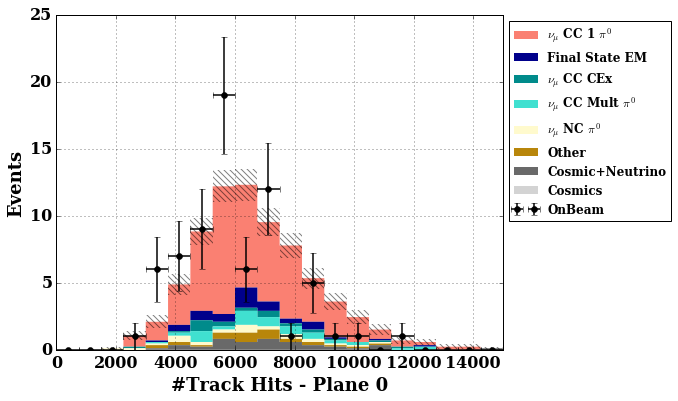

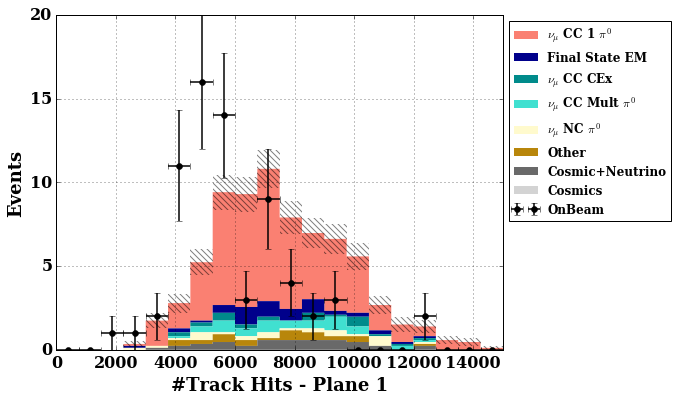

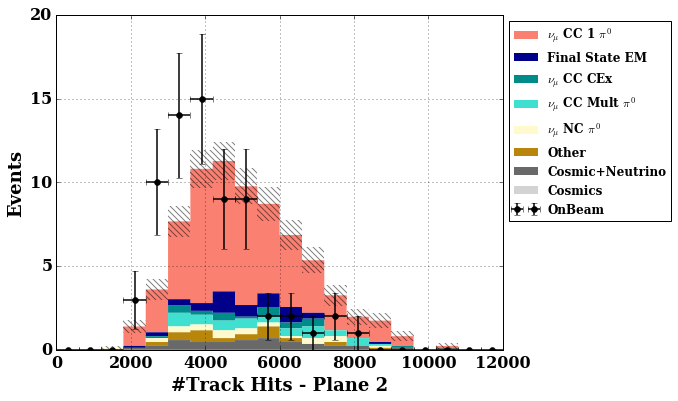

In [68]:
makeOnOffPlots('n_track_hits_0',0,15000,xlabel='#Track Hits - Plane 0')
makeOnOffPlots('n_track_hits_1',0,15000,xlabel='#Track Hits - Plane 1')
makeOnOffPlots('n_track_hits_2',0,12000,xlabel='#Track Hits - Plane 2')

In [77]:
print df.shape[0]

633


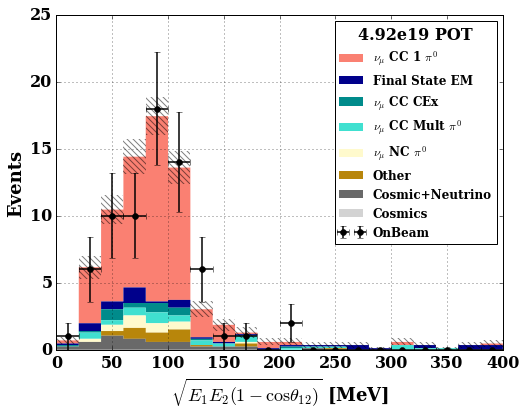

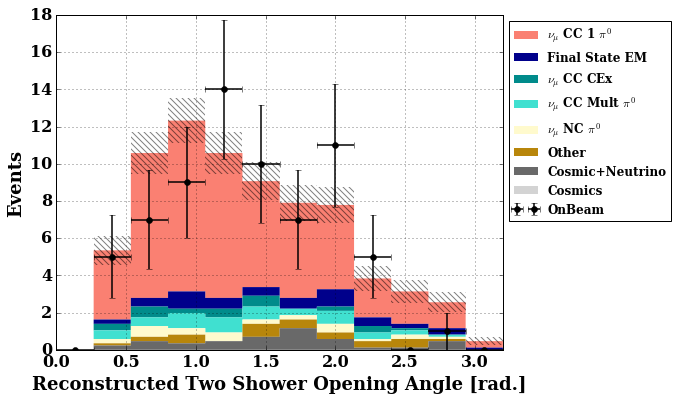

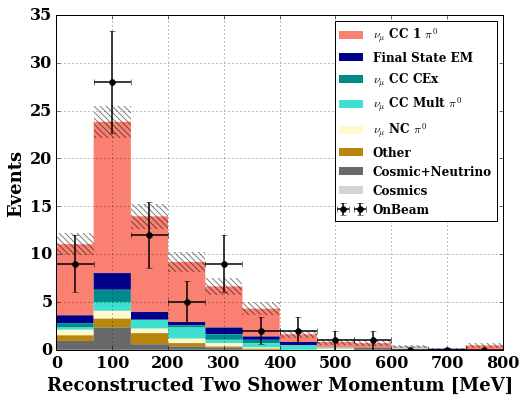

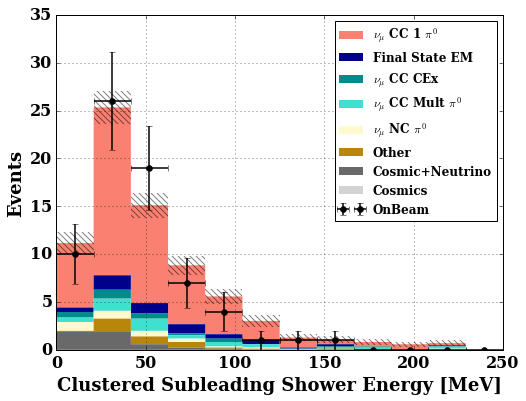

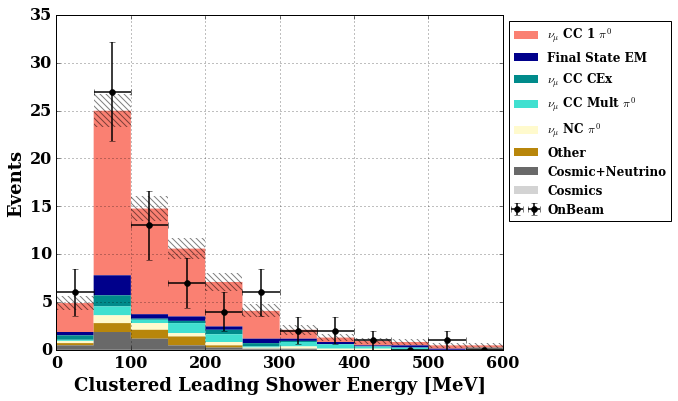

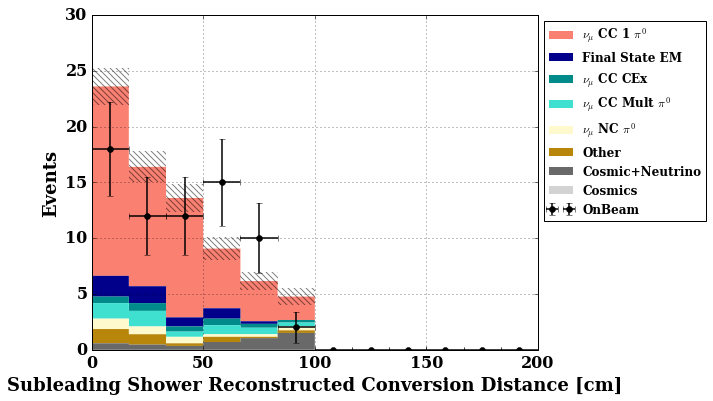

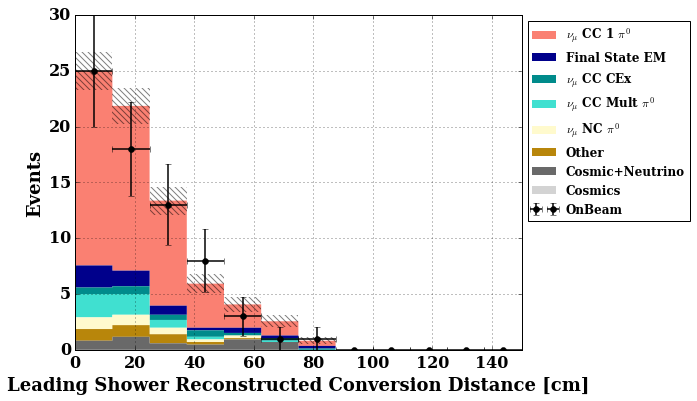

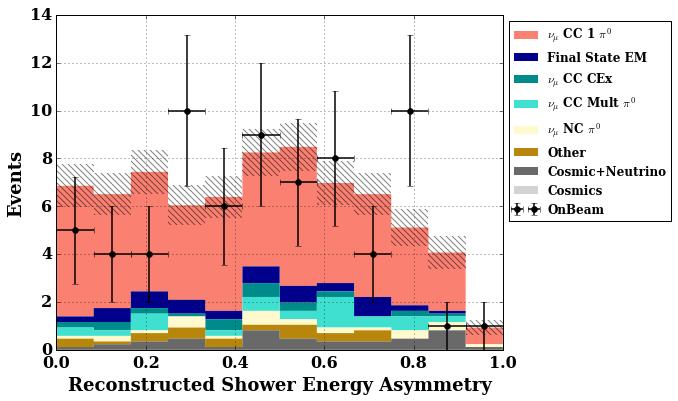

In [80]:
makeOnOffPlots('pi0_mass',0,400,xlabel='$\sqrt{E_1 E_2 (1-\cos\\theta_{12})}$ [MeV]',pottitle='4.92e19 POT')
makeOnOffPlots('pi0_oangle',0,3.2,nbins=12,xlabel='Reconstructed Two Shower Opening Angle [rad.]')
makeOnOffPlots('pi0_mom',0,800,nbins=12,xlabel='Reconstructed Two Shower Momentum [MeV]')
makeOnOffPlots('pi0_low_shrE',0,250,nbins=12,xlabel='Clustered Subleading Shower Energy [MeV]')
makeOnOffPlots('pi0_high_shrE',0,600,nbins=12,xlabel='Clustered Leading Shower Energy [MeV]')
makeOnOffPlots('pi0_low_radL',0,200,nbins=12,xlabel='Subleading Shower Reconstructed Conversion Distance [cm]')
makeOnOffPlots('pi0_high_radL',0,150,nbins=12,xlabel='Leading Shower Reconstructed Conversion Distance [cm]')
makeOnOffPlots('pi0_Easym',0,1,nbins=12,xlabel='Reconstructed Shower Energy Asymmetry') 

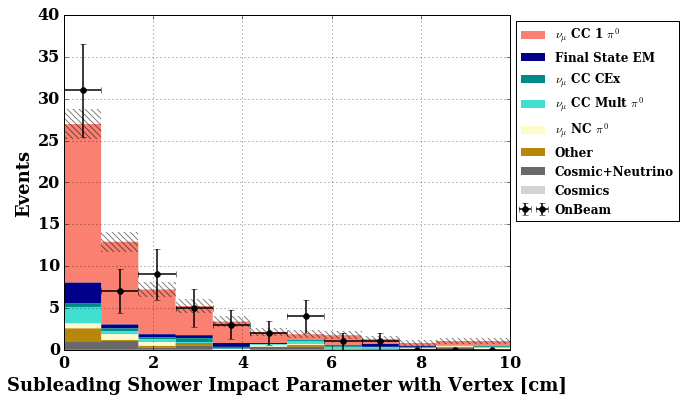

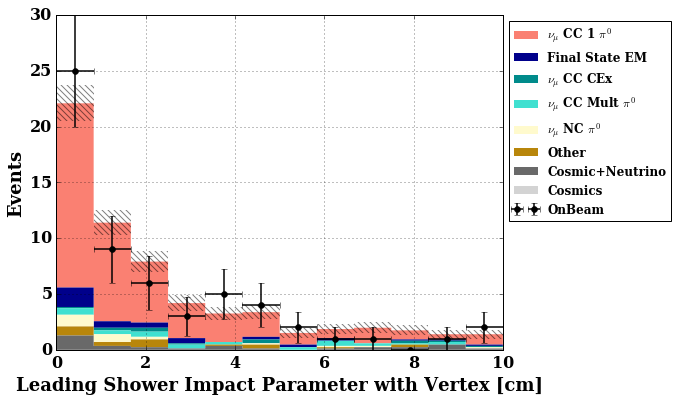

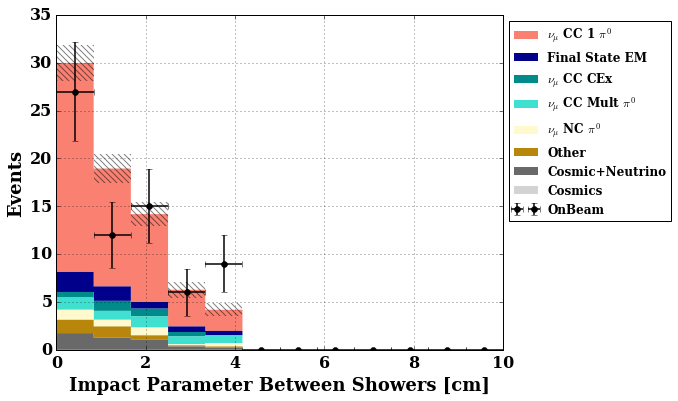

In [81]:

makeOnOffPlots('pi0_low_IP_w_vtx',0,10,nbins=12,xlabel='Subleading Shower Impact Parameter with Vertex [cm]')
makeOnOffPlots('pi0_high_IP_w_vtx',0,10,nbins=12,xlabel='Leading Shower Impact Parameter with Vertex [cm]')
makeOnOffPlots('pi0_IP',0,10,nbins=12,xlabel='Impact Parameter Between Showers [cm]')

In [82]:
df0['pi0_low_shrE_corr'] = df0['pi0_low_shrE'] / 0.77
df1['pi0_low_shrE_corr'] = df1['pi0_low_shrE'] / 0.77
df['pi0_low_shrE_corr'] = df['pi0_low_shrE'] / 0.77
df0['pi0_high_shrE_corr'] = df0['pi0_high_shrE'] / 0.77
df1['pi0_high_shrE_corr'] = df1['pi0_high_shrE'] / 0.77
df['pi0_high_shrE_corr'] = df['pi0_high_shrE'] / 0.77

df0['pi0_mass_corr'] = np.sqrt( 2 * df0['pi0_low_shrE_corr'] * df0['pi0_high_shrE_corr'] *\
                               (1 - np.cos(df0['pi0_oangle'])))
df1['pi0_mass_corr'] = np.sqrt( 2 * df1['pi0_low_shrE_corr'] * df1['pi0_high_shrE_corr'] *\
                               (1 - np.cos(df1['pi0_oangle'])))
df['pi0_mass_corr'] = np.sqrt( 2 * df['pi0_low_shrE_corr'] * df['pi0_high_shrE_corr'] *\
                               (1 - np.cos(df['pi0_oangle'])))


df['pi0_E_w_asym']  = df['pi0_mass'] * np.sqrt( 2 / ( 1 - df['pi0_Easym']**2)*(1 - np.cos(df['pi0_oangle'])) ) 
df0['pi0_E_w_asym']  = df0['pi0_mass'] * np.sqrt( 2 / ( 1 - df0['pi0_Easym']**2)*(1 - np.cos(df0['pi0_oangle'])) ) 
df1['pi0_E_w_asym']  = df1['pi0_mass'] * np.sqrt( 2 / ( 1 - df1['pi0_Easym']**2)*(1 - np.cos(df1['pi0_oangle'])) ) 


cos_v = df.query('bkgd_id == 1')
cc1pi0_v = df.query('bkgd_id == 2')
cc0pi0_v = df.query('bkgd_id == 3')
nc1pi0_v = df.query('bkgd_id == 4')
nc0pi0_v = df.query('bkgd_id == 5')
oth_v = df.query('bkgd_id == 6')

#print cos_v.shape[0] + nc_v.shape[0] + mult_v.shape[0] + sig_v.shape[0] + ccoth_v.shape[0] + test_v.shape[0]

colors_tst = ['purple','yellow','lime','green','lightskyblue','salmon'] #magenta','tan']
labels_tst = ['Other','Cosmic','NC 1-$\pi^0$','NC 0-$\pi^0$','CC 0-$\pi^0$','Signal']

In [83]:
all_but_sig_v = df.query('bkgd_id != 2')

dfa = df.query('pi0_low_origin != 2 and pi0_high_origin != 2')

cos_v = df.query('bkgd_id == 1 or pi0_low_origin == 2 or pi0_high_origin == 2')
cc1pi0_v = dfa.query('bkgd_id == 2')
nc1pi0_v = dfa.query('bkgd_id == 3')
multpi0_v = dfa.query('bkgd_id == 5')
cccex_v = dfa.query('bkgd_id == 8 ')
nu_EM_v = dfa.query('bkgd_id == 10 or ((bkgd_id ==12 or bkgd_id ==11) &\
                   (pi0_low_type == 1 or pi0_high_type == 1) )')

oth_v = dfa.query('bkgd_id == 0 or bkgd_id == 4 or\
                  bkgd_id == 6 or bkgd_id == 7 or bkgd_id == 9 or bkgd_id == 13 or \
                  ((bkgd_id ==12 or bkgd_id ==11) & pi0_low_type != 1 & pi0_high_type != 1)')

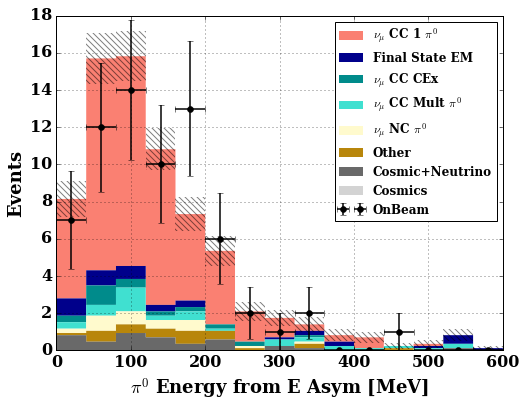

In [84]:
makeOnOffPlots('pi0_E_w_asym',0,600,nbins=15,xlabel='$\pi^0$ Energy from E Asym [MeV]')


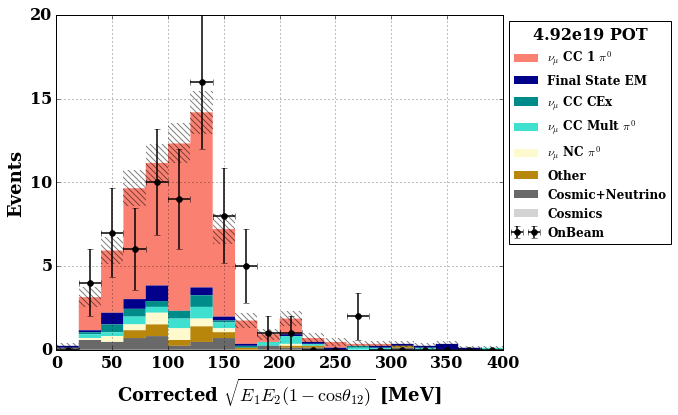

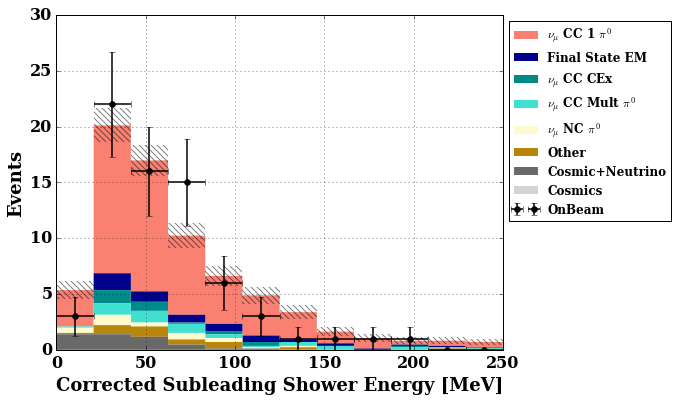

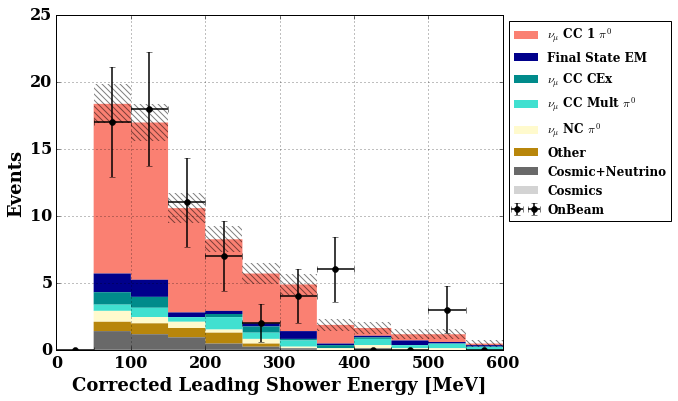

In [86]:
makeOnOffPlots('pi0_mass_corr',0,400,xlabel='Corrected $\sqrt{E_1 E_2 (1-\cos\\theta_{12})}$ [MeV]',pottitle='4.92e19 POT')
makeOnOffPlots('pi0_low_shrE_corr',0,250,nbins=12,xlabel='Corrected Subleading Shower Energy [MeV]')
makeOnOffPlots('pi0_high_shrE_corr',0,600,nbins=12,xlabel='Corrected Leading Shower Energy [MeV]')


#makeOnOffPlots('pi0_mass',0,400,xlabel='Reconstructed $\pi^0$ Mass - 5E19')
#makeOnOffPlots('pi0_low_shrE',0,250,xlabel='Low Energy $\\gamma$ [MeV]')
#makeOnOffPlots('pi0_high_shrE',0,600,xlabel='High Energy $\\gamma$ [MeV]')


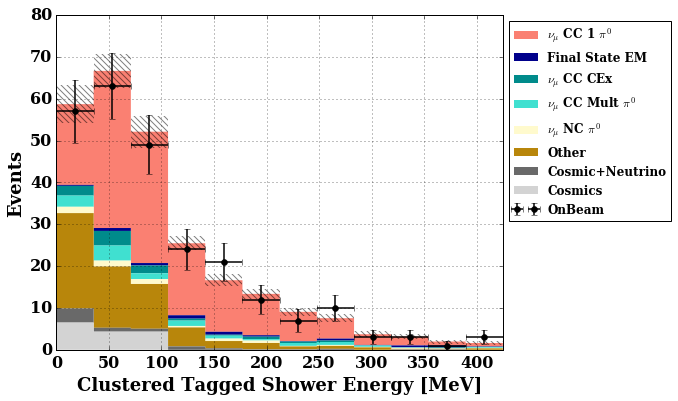

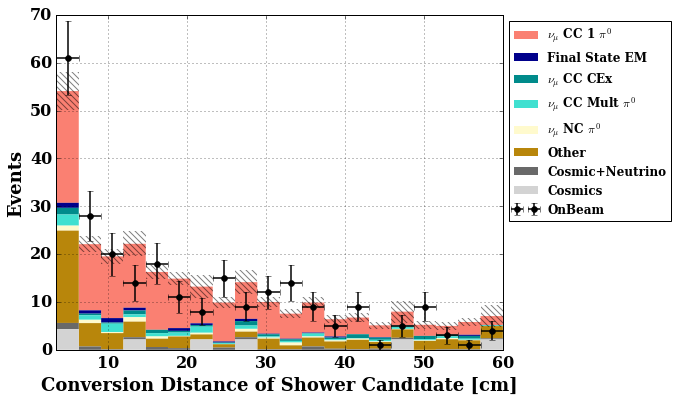

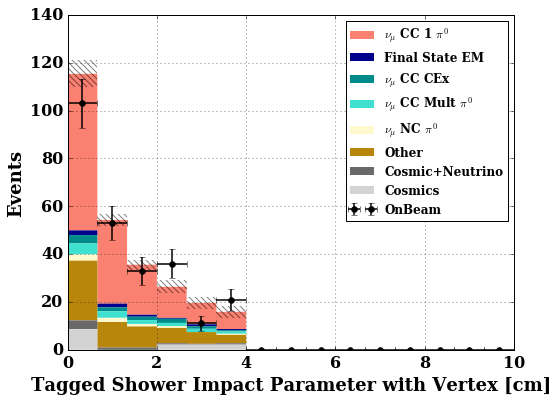

In [103]:
#Single Shower plots
makeOnOffPlots('gamma_E',0,425,nbins=12,xlabel='Clustered Tagged Shower Energy [MeV]')
makeOnOffPlots('gamma_RL',3.5,60,nbins=20,xlabel='Conversion Distance of Shower Candidate [cm]')
makeOnOffPlots('gamma_IP_w_vtx',0,10,nbins=15,xlabel='Tagged Shower Impact Parameter with Vertex [cm]')


#makePlots('gamma_E',0,400,xlabel='$\\gamma$ Energy [MeV]')
#makePlots('gamma_RL',0,60,xlabel='$\\gamma$ Radiation Length [cm]')


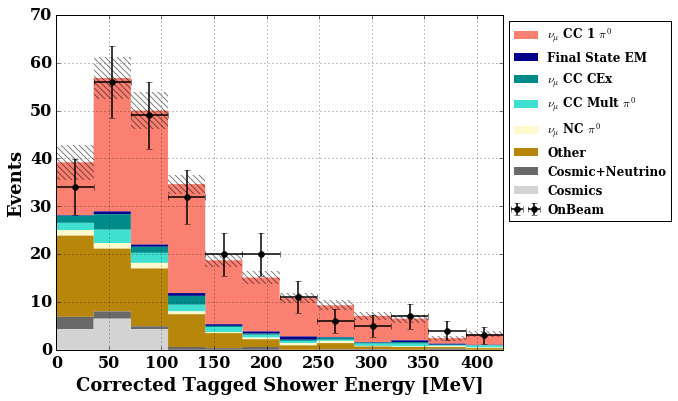

In [104]:
df0['gamma_E_corr'] = df0['gamma_E'] / 0.77
df1['gamma_E_corr'] = df1['gamma_E'] / 0.77
df['gamma_E_corr'] = df['gamma_E'] / 0.77

all_but_sig_v = df.query('bkgd_id != 2')

dfa = df.query('pi0_low_origin != 2 and pi0_high_origin != 2')

cos_v = df.query('bkgd_id == 1 or pi0_low_origin == 2 or pi0_high_origin == 2')
cc1pi0_v = dfa.query('bkgd_id == 2')
nc1pi0_v = dfa.query('bkgd_id == 3')
multpi0_v = dfa.query('bkgd_id == 5')
cccex_v = dfa.query('bkgd_id == 8 ')
nu_EM_v = dfa.query('bkgd_id == 10 or ((bkgd_id ==12 or bkgd_id ==11) &\
                   (pi0_low_type == 1 or pi0_high_type == 1) )')

oth_v = dfa.query('bkgd_id == 0 or bkgd_id == 4 or\
                  bkgd_id == 6 or bkgd_id == 7 or bkgd_id == 9 or bkgd_id == 13 or \
                  ((bkgd_id ==12 or bkgd_id ==11) & pi0_low_type != 1 & pi0_high_type != 1)')

#all_but_sig_v = df.query('bkgd_id != 2')
makeOnOffPlots('gamma_E_corr',0,425,nbins=12,xlabel='Corrected Tagged Shower Energy [MeV]')